### Code to generate the discontinuity plots for basis vectors that are a function of a parameter

*Note:* the report considered the parameter $t$, whereas this considers $\lambda$. It is equivalent.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
magnitudes = np.random.rand(11)

$$e_x=\begin{pmatrix}-\lambda^{3/2}\\ 1 \\ \lambda\end{pmatrix},\:e_y=\begin{pmatrix}3/(\lambda+2) \\ -\lambda\\ -e^{\lambda }\end{pmatrix},e_z=\begin{pmatrix}(3/2)^{\lambda }\\ 1/2 \\ 1/(e^\lambda+1) \end{pmatrix}$$

In [3]:
import numpy as np

def calculate_basis_vectors(lambda_value):
    e_x = np.array([-lambda_value**(3/2), 1, lambda_value])
    e_y = np.array([3/(lambda_value + 2), -lambda_value, -np.exp(lambda_value)])
    e_z = np.array([(3/2)**lambda_value, 1/2, 1/(np.exp(lambda_value) + 1)])
    return e_x, e_y, e_z

def find_shortest_vector(e_x, e_y, e_z, max_coeff=3):
    min_length = float('inf')
    best_a, best_b, best_c = 0, 0, 0
    for a in range(-max_coeff, max_coeff + 1):
        for b in range(-max_coeff, max_coeff + 1):
            for c in range(-max_coeff, max_coeff + 1):
                if a == 0 and b == 0 and c == 0:
                    continue
                v = a * e_x + b * e_y + c * e_z
                length = np.linalg.norm(v)
                if length < min_length:
                    best_a, best_b, best_c = a, b, c
                    min_length = length
    return best_a, best_b, best_c

def main():
    # vary lambda from 0 to 2 in steps of 0.1
    lambda_values = np.arange(0, 2.1, 0.1)
    
    for lambda_value in lambda_values:
        e_x, e_y, e_z = calculate_basis_vectors(lambda_value)
        
        # find the shortest vector coefficients
        a, b, c = find_shortest_vector(e_x, e_y, e_z)
        
        print(f"Lambda = {lambda_value:.1f}: Shortest Vector Coefficients a = {a}, b = {b}, c = {c}")

main()

Lambda = 0.0: Shortest Vector Coefficients a = -1, b = 0, c = 0
Lambda = 0.1: Shortest Vector Coefficients a = -1, b = 0, c = 0
Lambda = 0.2: Shortest Vector Coefficients a = -1, b = 0, c = 0
Lambda = 0.3: Shortest Vector Coefficients a = -1, b = 0, c = 0
Lambda = 0.4: Shortest Vector Coefficients a = -1, b = 0, c = 0
Lambda = 0.5: Shortest Vector Coefficients a = -1, b = 0, c = 0
Lambda = 0.6: Shortest Vector Coefficients a = -1, b = 0, c = 0
Lambda = 0.7: Shortest Vector Coefficients a = -1, b = 0, c = 0
Lambda = 0.8: Shortest Vector Coefficients a = -2, b = -1, c = 0
Lambda = 0.9: Shortest Vector Coefficients a = -2, b = -1, c = 0
Lambda = 1.0: Shortest Vector Coefficients a = -2, b = -1, c = 0
Lambda = 1.1: Shortest Vector Coefficients a = -2, b = -1, c = -1
Lambda = 1.2: Shortest Vector Coefficients a = -2, b = -1, c = -1
Lambda = 1.3: Shortest Vector Coefficients a = -2, b = -1, c = -1
Lambda = 1.4: Shortest Vector Coefficients a = -2, b = -1, c = -1
Lambda = 1.5: Shortest Vector

In [4]:
## CREATE RESULTS_ARRAY ##

np.set_printoptions(suppress=True, precision=4, floatmode='fixed')

def calculate_basis_vectors(lambda_value):
    e_x = np.array([-lambda_value**(3/2), 1, lambda_value])
    e_y = np.array([3/(lambda_value + 2), -lambda_value, -np.exp(lambda_value)])
    e_z = np.array([(3/2)**lambda_value, 1/2, 1/(np.exp(lambda_value) + 1)])
    return e_x, e_y, e_z

def find_shortest_vector(e_x, e_y, e_z, max_coeff=3):
    min_length = float('inf')
    best_a, best_b, best_c = 0, 0, 0
    for a in range(-max_coeff, max_coeff + 1):
        for b in range(-max_coeff, max_coeff + 1):
            for c in range(-max_coeff, max_coeff + 1):
                if a == 0 and b == 0 and c == 0:
                    continue
                v = a * e_x + b * e_y + c * e_z
                length = np.linalg.norm(v)
                if length < min_length:
                    best_a, best_b, best_c = a, b, c
                    min_length = length
    return best_a, best_b, best_c

def generate_initial_eta_coefficients(a, b, c, magnitudes):
    num_bits_per_coordinate = 4
    ket_representation = coordinates_to_ket(a, b, c, num_bits_per_coordinate)
    eta_values = generate_eta_values(ket_representation, magnitudes)
    return eta_values

def coordinates_to_ket(a, b, c, num_bits_per_coordinate):
    combined_bin = encode_to_index(a, b, c, num_bits_per_coordinate)
    return combined_bin

def encode_to_index(a, b, c, num_bits_per_coordinate):
    a_bin = signed_magnitude(a, num_bits_per_coordinate)
    b_bin = signed_magnitude(b, num_bits_per_coordinate)
    c_bin = signed_magnitude(c, num_bits_per_coordinate)
    combined_bin = a_bin + b_bin + c_bin
    return combined_bin

def signed_magnitude(value, bits):
    sign_bit = '0' if value >= 0 else '1'
    magnitude = abs(value)
    magnitude_bin = format(magnitude, f'0{bits - 1}b')
    return sign_bit + magnitude_bin

def generate_eta_values(ket, magnitudes):
    if len(ket) != 12 or any(c not in '01' for c in ket):
        raise ValueError("The input must be a string of 12 characters containing only '0' or '1'.")
    
    signed_eta_values = np.zeros(11)
    
    for i in range(11):
        if ket[i] == ket[i+1]:
            signed_eta_values[i] = -magnitudes[i]
        else:
            signed_eta_values[i] = magnitudes[i]
    
    return signed_eta_values

def adjust_eta_coefficients(previous_eta, new_eta, lambda_value):
    adjusted_eta = np.copy(new_eta)
    offset = lambda_value / 10  # lambda-dependent offset
    for i in range(len(new_eta)):
        if np.sign(previous_eta[i]) == np.sign(new_eta[i]):
            adjusted_eta[i] = previous_eta[i]  # keep the value if the sign matches
        else:
            adjusted_eta[i] = offset * np.sign(new_eta[i])  # use offset with the sign of new_eta
    return adjusted_eta

def main():
    lambda_values = np.arange(0, 2.1, 0.1)

    e_x, e_y, e_z = calculate_basis_vectors(0)
    initial_a, initial_b, initial_c = find_shortest_vector(e_x, e_y, e_z)
    
    eta_coefficients = generate_initial_eta_coefficients(initial_a, initial_b, initial_c, magnitudes)
    print(f"Lambda = 0.0: a, b, c = ({initial_a}, {initial_b}, {initial_c}), Eta Coefficients = {eta_coefficients}")
    
    previous_a, previous_b, previous_c = initial_a, initial_b, initial_c
    
    results = []

    # iterate over lambda values
    for lambda_value in lambda_values[1:]:
        # calculate new basis vectors for the current lambda
        e_x, e_y, e_z = calculate_basis_vectors(lambda_value)
        
        # find the new shortest vector coefficients
        current_a, current_b, current_c = find_shortest_vector(e_x, e_y, e_z)
        
        if (current_a, current_b, current_c) == (previous_a, previous_b, previous_c):
            # a, b, c do not change: add constant offset based on sign and lambda
            eta_coefficients += (lambda_value / 10) * np.sign(eta_coefficients)
        else:
            # a, b, c change: adjust eta coefficients
            new_eta = generate_initial_eta_coefficients(current_a, current_b, current_c, magnitudes)
            eta_coefficients = adjust_eta_coefficients(eta_coefficients, new_eta, lambda_value)
            previous_a, previous_b, previous_c = current_a, current_b, current_c
        
        print(f"Lambda = {lambda_value:.1f}: a, b, c = ({current_a}, {current_b}, {current_c}), Eta Coefficients = {eta_coefficients}")
        
        results.append((lambda_value, current_a, current_b, current_c, np.copy(eta_coefficients)))

    results_array = np.array(results, dtype=[('lambda', 'f8'), ('a', 'i4'), ('b', 'i4'), ('c', 'i4'), ('eta_coefficients', 'O')])

    return results_array

results_array = main()

print("\nResults Array:")
for entry in results_array:
    print(f"Lambda = {entry['lambda']:.1f}: a, b, c = ({entry['a']}, {entry['b']}, {entry['c']}), Eta Coefficients = {entry['eta_coefficients']}")

Lambda = 0.0: a, b, c = (-1, 0, 0), Eta Coefficients = [ 0.3346 -0.6247  0.0680  0.6988 -0.5390 -0.4191 -0.3219 -0.2553 -0.0510
 -0.0443 -0.2230]
Lambda = 0.1: a, b, c = (-1, 0, 0), Eta Coefficients = [ 0.3446 -0.6347  0.0780  0.7088 -0.5490 -0.4291 -0.3319 -0.2653 -0.0610
 -0.0543 -0.2330]
Lambda = 0.2: a, b, c = (-1, 0, 0), Eta Coefficients = [ 0.3646 -0.6547  0.0980  0.7288 -0.5690 -0.4491 -0.3519 -0.2853 -0.0810
 -0.0743 -0.2530]
Lambda = 0.3: a, b, c = (-1, 0, 0), Eta Coefficients = [ 0.3946 -0.6847  0.1280  0.7588 -0.5990 -0.4791 -0.3819 -0.3153 -0.1110
 -0.1043 -0.2830]
Lambda = 0.4: a, b, c = (-1, 0, 0), Eta Coefficients = [ 0.4346 -0.7247  0.1680  0.7988 -0.6390 -0.5191 -0.4219 -0.3553 -0.1510
 -0.1443 -0.3230]
Lambda = 0.5: a, b, c = (-1, 0, 0), Eta Coefficients = [ 0.4846 -0.7747  0.2180  0.8488 -0.6890 -0.5691 -0.4719 -0.4053 -0.2010
 -0.1943 -0.3730]
Lambda = 0.6: a, b, c = (-1, 0, 0), Eta Coefficients = [ 0.5446 -0.8347  0.2780  0.9088 -0.7490 -0.6291 -0.5319 -0.4653 -0.2

In [5]:
## CREATE PLOTTING_ARRAY ##

np.set_printoptions(suppress=True, precision=4, floatmode='fixed')

def calculate_basis_vectors(lambda_value):
    e_x = np.array([-lambda_value**(3/2), 1, lambda_value])
    e_y = np.array([3/(lambda_value + 2), -lambda_value, -np.exp(lambda_value)])
    e_z = np.array([(3/2)**lambda_value, 1/2, 1/(np.exp(lambda_value) + 1)])
    return e_x, e_y, e_z

def calculate_gram_matrix(e_x, e_y, e_z):
    G = np.array([
        [np.dot(e_x, e_x), np.dot(e_x, e_y), np.dot(e_x, e_z)],
        [np.dot(e_y, e_x), np.dot(e_y, e_y), np.dot(e_y, e_z)],
        [np.dot(e_z, e_x), np.dot(e_z, e_y), np.dot(e_z, e_z)]
    ])
    return G

def pauli_z():
    return np.array([[1, 0], [0, -1]])

def identity():
    return np.eye(2)

def tensor_product(operators):
    result = operators[0]
    for op in operators[1:]:
        result = np.kron(result, op)
    return result

def construct_hamiltonian(num_qubits, coefficients, mu):
    H = np.zeros((2**num_qubits, 2**num_qubits))
    for i, coeff in enumerate(coefficients):
        ops = [identity()] * num_qubits
        ops[i] = pauli_z()
        ops[i + 1] = pauli_z()
        H += coeff * tensor_product(ops)
    
    for i in range(num_qubits - 1):  
        ops = [identity()] * num_qubits
        ops[i] = pauli_z()
        H += mu * tensor_product(ops)
    
    return H

def compute_frobenius_norm(matrix1, matrix2):
    return np.linalg.norm(matrix1 - matrix2, 'fro')

def calculate_and_print_norms(results_array, num_qubits, mu):
    lambda_values = results_array['lambda']

    # calculate initial Gram matrix
    e_x_initial, e_y_initial, e_z_initial = calculate_basis_vectors(0)
    G_initial = calculate_gram_matrix(e_x_initial, e_y_initial, e_z_initial)

    # calculate initial Hamiltonian
    initial_eta = results_array['eta_coefficients'][0]  
    H_previous = construct_hamiltonian(num_qubits, initial_eta, mu)

    plotting_data = []

    for i, result in enumerate(results_array):
        lambda_value = result['lambda']
        
        # calculate Gram matrix for current lambda
        e_x, e_y, e_z = calculate_basis_vectors(lambda_value)
        G_current = calculate_gram_matrix(e_x, e_y, e_z)
        
        # compute norm of difference from initial Gram matrix
        gram_norm = compute_frobenius_norm(G_initial, G_current)
        
        # calculate Hamiltonian for current eta coefficients
        current_eta = result['eta_coefficients']
        H_current = construct_hamiltonian(num_qubits, current_eta, mu)
        
        # compute norm of difference from previous Hamiltonian
        if i > 0:
            hamiltonian_norm = compute_frobenius_norm(H_previous, H_current)
            print(f"Lambda = {lambda_value:.1f}: Gram Norm = {gram_norm:.4f}, Hamiltonian Norm = {hamiltonian_norm:.4f}")
            plotting_data.append((gram_norm, hamiltonian_norm))
        else:
            print(f"Lambda = {lambda_value:.1f}: Gram Norm = {gram_norm:.4f} (Initial, no Hamiltonian difference)")
            plotting_data.append((gram_norm, 0))  # no Hamiltonian difference for the initial case
        
        # update previous Hamiltonian
        H_previous = H_current

    plotting_array = np.array(plotting_data, dtype=[('gram_norm', 'f8'), ('hamiltonian_norm', 'f8')])

    return plotting_array

num_qubits = 12
mu = 0.000001

plotting_array = calculate_and_print_norms(results_array, num_qubits, mu)

print("\nPlotting Array:")
for entry in plotting_array:
    print(f"Gram Norm = {entry['gram_norm']:.4f}, Hamiltonian Norm = {entry['hamiltonian_norm']:.4f}")

Lambda = 0.1: Gram Norm = 0.3881 (Initial, no Hamiltonian difference)
Lambda = 0.2: Gram Norm = 0.8595, Hamiltonian Norm = 4.2453
Lambda = 0.3: Gram Norm = 1.4183, Hamiltonian Norm = 6.3679
Lambda = 0.4: Gram Norm = 2.0797, Hamiltonian Norm = 8.4906
Lambda = 0.5: Gram Norm = 2.8628, Hamiltonian Norm = 10.6132
Lambda = 0.6: Gram Norm = 3.7904, Hamiltonian Norm = 12.7358
Lambda = 0.7: Gram Norm = 4.8894, Hamiltonian Norm = 14.8585
Lambda = 0.8: Gram Norm = 6.1916, Hamiltonian Norm = 103.6197
Lambda = 0.9: Gram Norm = 7.7347, Hamiltonian Norm = 19.1038
Lambda = 1.0: Gram Norm = 9.5636, Hamiltonian Norm = 21.2264
Lambda = 1.1: Gram Norm = 11.7324, Hamiltonian Norm = 69.7391
Lambda = 1.2: Gram Norm = 14.3066, Hamiltonian Norm = 25.4717
Lambda = 1.3: Gram Norm = 17.3653, Hamiltonian Norm = 27.5943
Lambda = 1.4: Gram Norm = 21.0052, Hamiltonian Norm = 29.7170
Lambda = 1.5: Gram Norm = 25.3440, Hamiltonian Norm = 31.8396
Lambda = 1.6: Gram Norm = 30.5257, Hamiltonian Norm = 210.0109
Lambda = 1

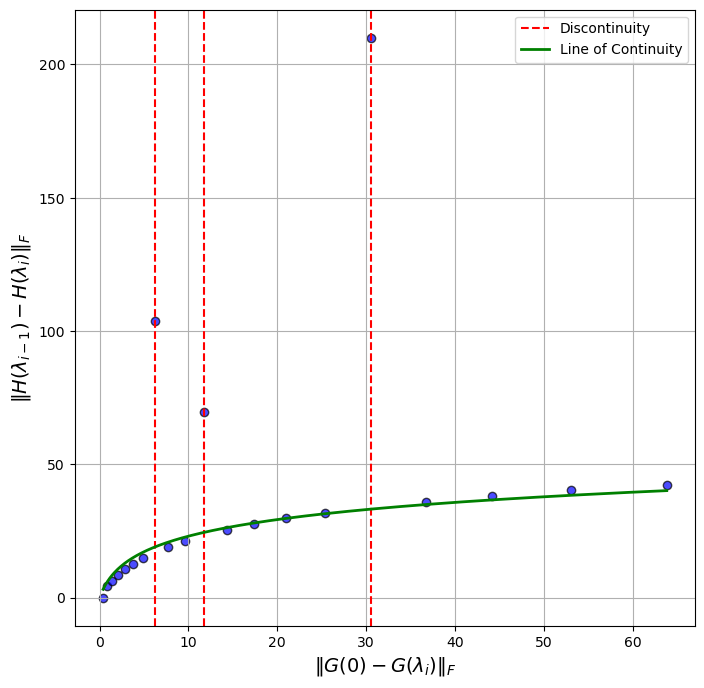

In [6]:
def log_function(x, a):
    return a * np.log(x + 1)

def plot_hamiltonian_vs_gram(plotting_array):

    # extract data from plotting array
    gram_norms = plotting_array['gram_norm']
    hamiltonian_norms = plotting_array['hamiltonian_norm']

    hamiltonian_diff = np.abs(np.diff(hamiltonian_norms))

    # skip the first one to avoid division by zero
    relative_changes = np.zeros_like(hamiltonian_diff)
    relative_changes[1:] = hamiltonian_diff[1:] / np.maximum(hamiltonian_norms[1:-1], 1e-10)

    # define a threshold to detect discontinuity 
    discontinuity_threshold = 2  

    # find the indices where the discontinuities occur
    discontinuity_indices = np.where(relative_changes > discontinuity_threshold)[0]

    # filter out the discontinuous regions for fitting
    fit_indices = np.setdiff1d(np.arange(len(gram_norms)), discontinuity_indices + 1)

    # curve fitting
    popt, _ = curve_fit(log_function, gram_norms[fit_indices], hamiltonian_norms[fit_indices], p0=[1])

    plt.figure(figsize=(8, 8))
    plt.scatter(gram_norms, hamiltonian_norms, color='blue', alpha=0.7, edgecolors='k')

    plt.xlabel('$\|G(0) - G(\lambda_i)\|_F$',fontsize=14)
    plt.ylabel('$\|H(\lambda_{i-1}) - H(\lambda_{i})\|_F$',fontsize=14)
    plt.grid(True)

    # vertical dashed line at each detected discontinuity
    for discontinuity_index in discontinuity_indices:
        plt.axvline(x=gram_norms[discontinuity_index + 1], color='red', linestyle='--', label='Discontinuity' if discontinuity_index == discontinuity_indices[0] else "")

    x_fit = np.linspace(min(gram_norms), max(gram_norms), 500)
    y_fit = log_function(x_fit, *popt)
    plt.plot(x_fit, y_fit, color='green', linestyle='-', linewidth=2, label='Line of Continuity')

    plt.legend()

    plt.show()

plot_hamiltonian_vs_gram(plotting_array)